In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

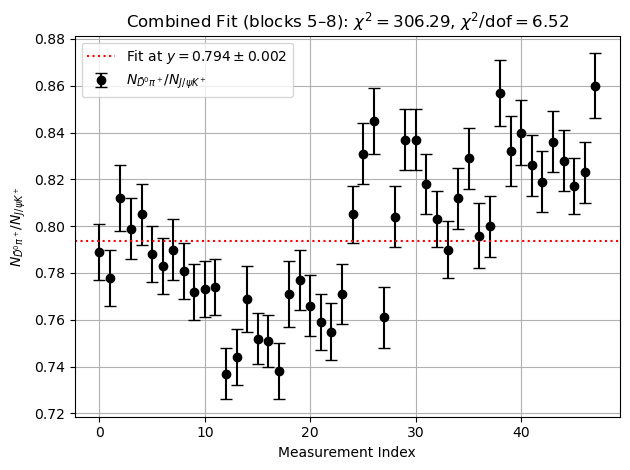

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Combined Data from Blocks 5 to 8 ===

x_list = np.arange(48)  # 0 to 47

y_values = np.array([
    # Block 5
    0.789, 0.778, 0.812, 0.799, 0.805, 0.788, 0.783, 0.790, 0.781, 0.772, 0.773, 0.774,
    # Block 6
    0.737, 0.744, 0.769, 0.752, 0.751, 0.738, 0.771, 0.777, 0.766, 0.759, 0.755, 0.771,
    # Block 7
    0.805, 0.831, 0.845, 0.761, 0.804, 0.837, 0.837, 0.818, 0.803, 0.790, 0.812, 0.829,
    # Block 8
    0.796, 0.800, 0.857, 0.832, 0.840, 0.826, 0.819, 0.836, 0.828, 0.817, 0.823, 0.860
])

y_errors = np.array([
    # Block 5
    0.012, 0.012, 0.014, 0.013, 0.013, 0.012, 0.012, 0.013, 0.012, 0.012, 0.012, 0.012,
    # Block 6
    0.011, 0.012, 0.014, 0.011, 0.011, 0.012, 0.014, 0.013, 0.013, 0.012, 0.012, 0.013,
    # Block 7
    0.012, 0.013, 0.014, 0.013, 0.013, 0.013, 0.013, 0.013, 0.012, 0.012, 0.013, 0.013,
    # Block 8
    0.014, 0.013, 0.014, 0.015, 0.014, 0.013, 0.013, 0.013, 0.013, 0.012, 0.013, 0.014
])

# === Define Constant Fit Function ===
def constant_model(x, a):
    return a

# === Fit the Constant Model ===
popt, pcov = curve_fit(constant_model, x_list, y_values, sigma=y_errors, absolute_sigma=True)
fit_value = popt[0]
fit_error = np.sqrt(pcov[0, 0])

# === Compute Fit Line and Chi-Squared ===
fit_line = constant_model(x_list, *popt)
chi_squared = np.sum(((y_values - fit_line) / y_errors) ** 2)
dof = len(y_values) - len(popt)  # degrees of freedom
reduced_chi2 = chi_squared / dof

# === Plot ===
plt.errorbar(x_list, y_values, yerr=y_errors, fmt='o', color='black', capsize=4, label=r'$N_{\bar{D}^0\pi^+} / N_{J/\psi K^+}$')
plt.axhline(fit_value, color='red', linestyle='dotted', label=fr'Fit at $y = {fit_value:.3f} \pm {fit_error:.3f}$')
plt.title(fr'Combined Fit (blocks 5–8): $\chi^2 = {chi_squared:.2f}$, $\chi^2/\mathrm{{dof}} = {reduced_chi2:.2f}$')
plt.xlabel('Measurement Index')
plt.ylabel(r'$N_{\bar{D}^0\pi^+} / N_{J/\psi K^+}$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
